In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, glob
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
with open('trainset_python/python/class_names.txt') as f:
    classes = f.readlines()

for i,c in enumerate(classes):
    classes[i] = c.strip()
    
classes

['0: other',
 '1: comcuc',
 '2: cowpig1',
 '3: eucdov',
 '4: eueowl1',
 '5: grswoo',
 '6: tawowl1']

In [3]:
with open('trainset_python/python/feature_names.txt') as f:
    features = f.readlines()

for i,feature in enumerate(features):
    features[i] = feature.strip()
    
len(features)

548

In [8]:
rootdir = os. getcwd()
files = []
files_stand = []
labels = []
data = []
data_stand = []
data_stand_with_label = []
    
for i,f in enumerate(glob.glob(rootdir + '/**/*.npy', recursive=True)):
    if (i % 2) == 0:
        label = pd.DataFrame(np.load(f))
        #lable = lable.rename(columns={lable.columns[0]: "overall_class"})
        for i, col in enumerate(label.columns):
            if i == 0:
                label = label.rename(columns={label.columns[0]: "overall_class_vote"})
            else:
                label = label.rename(columns={col: "class_vote_" + str(i)})
        labels.append(label)
    else:
        file = pd.DataFrame(np.load(f), columns = features)
        file_stand = pd.DataFrame(StandardScaler().fit_transform(np.load(f)), columns = features)
        files.append(file)
        files_stand.append(file_stand)
        data.append(pd.concat([file, label], axis=1, join="inner"))
        data_stand.append(pd.concat([file_stand], axis=1, join="inner"))
        data_stand_with_label.append(pd.concat([file_stand, label], axis=1, join="inner"))

In [9]:
data_stand_incl_label = data_stand.copy()
other_ids, comcuc_ids, cowpig1_ids, eucdov_ids, eueowl1_ids, grswoo_ids, tawowl1_ids = [], [], [], [], [], [], []

for i,d in enumerate(data):
    if 1 in set(d['overall_class_vote']):
        comcuc_ids.append(i)
    elif 2 in set(d['overall_class_vote']):
        cowpig1_ids.append(i)
    elif 3 in set(d['overall_class_vote']):
        eucdov_ids.append(i)
    elif 4 in set(d['overall_class_vote']):
        eueowl1_ids.append(i)
    elif 5 in set(d['overall_class_vote']):
        grswoo_ids.append(i)
    elif 6 in set(d['overall_class_vote']):
        tawowl1_ids.append(i)
    else: 
        other_ids.append(i)

print('other', other_ids)
print('comcuc', comcuc_ids)
print('cowpig1', cowpig1_ids)
print('eucdov', eucdov_ids)
print('eueowl1', eueowl1_ids)
print('grswoo', grswoo_ids)
print('tawowl1', tawowl1_ids)

other [52, 123, 138, 179, 228, 233, 243, 253, 297, 317, 331, 332, 347, 377, 464, 465, 539, 564, 569, 691, 711, 713, 731, 765, 837, 940, 942, 1156, 1167, 1188]
comcuc [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 19

In [10]:
df_data_comcuc = pd.DataFrame([row for idx in comcuc_ids for curr_data in [data_stand[idx].to_numpy()] for row in curr_data], columns=features)
df_data_cowpig1 = pd.DataFrame([row for idx in cowpig1_ids for curr_data in [data_stand[idx].to_numpy()] for row in curr_data], columns=features)
df_data_eucdov = pd.DataFrame([row for idx in eucdov_ids for curr_data in [data_stand[idx].to_numpy()] for row in curr_data], columns=features)
df_data_eueowl1 = pd.DataFrame([row for idx in eueowl1_ids for curr_data in [data_stand[idx].to_numpy()] for row in curr_data], columns=features)
df_data_grswoo = pd.DataFrame([row for idx in grswoo_ids for curr_data in [data_stand[idx].to_numpy()] for row in curr_data], columns=features)
df_data_tawowl1 = pd.DataFrame([row for idx in tawowl1_ids for curr_data in [data_stand[idx].to_numpy()] for row in curr_data], columns=features)

In [13]:
print(df_data_comcuc.shape)
print(df_data_cowpig1.shape)
print(df_data_eucdov.shape)
print(df_data_eueowl1.shape)
print(df_data_grswoo.shape)
print(df_data_tawowl1.shape)

(19600, 548)
(19000, 548)
(19500, 548)
(19500, 548)
(19700, 548)
(19700, 548)


In [16]:
df_labels_comcuc = pd.DataFrame([row for idx in comcuc_ids for curr_data in [labels[idx].to_numpy()[:, 0]] for row in curr_data], columns=['overall_class_vote'])
df_labels_cowpig1 = pd.DataFrame([row for idx in cowpig1_ids for curr_data in [labels[idx].to_numpy()[:, 0]] for row in curr_data], columns=['overall_class_vote'])
df_labels_eucdov = pd.DataFrame([row for idx in eucdov_ids for curr_data in [labels[idx].to_numpy()[:, 0]] for row in curr_data], columns=['overall_class_vote'])
df_labels_eueowl1 = pd.DataFrame([row for idx in eueowl1_ids for curr_data in [labels[idx].to_numpy()[:, 0]] for row in curr_data], columns=['overall_class_vote'])
df_labels_grswoo = pd.DataFrame([row for idx in grswoo_ids for curr_data in [labels[idx].to_numpy()[:, 0]] for row in curr_data], columns=['overall_class_vote'])
df_labels_tawowl1 = pd.DataFrame([row for idx in tawowl1_ids for curr_data in [labels[idx].to_numpy()[:, 0]] for row in curr_data], columns=['overall_class_vote'])

In [17]:
print(df_labels_comcuc.shape)
print(df_labels_cowpig1.shape)
print(df_labels_eucdov.shape)
print(df_labels_eueowl1.shape)
print(df_labels_grswoo.shape)
print(df_labels_tawowl1.shape)

(19600, 1)
(19000, 1)
(19500, 1)
(19500, 1)
(19700, 1)
(19700, 1)


In [21]:
from sklearn.feature_selection import mutual_info_classif

mutual_infos = [mutual_info_classif(df_data_comcuc, df_labels_comcuc), mutual_info_classif(df_data_cowpig1, df_labels_cowpig1), mutual_info_classif(df_data_eucdov, df_labels_eucdov), 
                mutual_info_classif(df_data_eueowl1, df_labels_eueowl1), mutual_info_classif(df_data_grswoo, df_labels_grswoo), mutual_info_classif(df_data_tawowl1, df_labels_tawowl1)]

C:\Users\Sandro\anaconda3\envs\ho2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandro\anaconda3\envs\ho2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandro\anaconda3\envs\ho2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandro\anaconda3\envs\ho2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [77]:
print(np.sum(mutual_infos[0]))
print(np.sum(mutual_infos[1]))
print(np.sum(mutual_infos[2]))
print(np.sum(mutual_infos[3]))
print(np.sum(mutual_infos[4]))
print(np.sum(mutual_infos[5]))

18.089818738479106
16.819499360097176
19.910972554883006
18.127164609498877
28.641119451721497
38.50805019716632


In [89]:
print(min(mutual_infos[0]))
print(max(mutual_infos[0]))

0.0
0.27993999213301524


In [27]:
mutual_infos = np.array(mutual_infos)
print(mutual_infos.shape)

(6, 548)


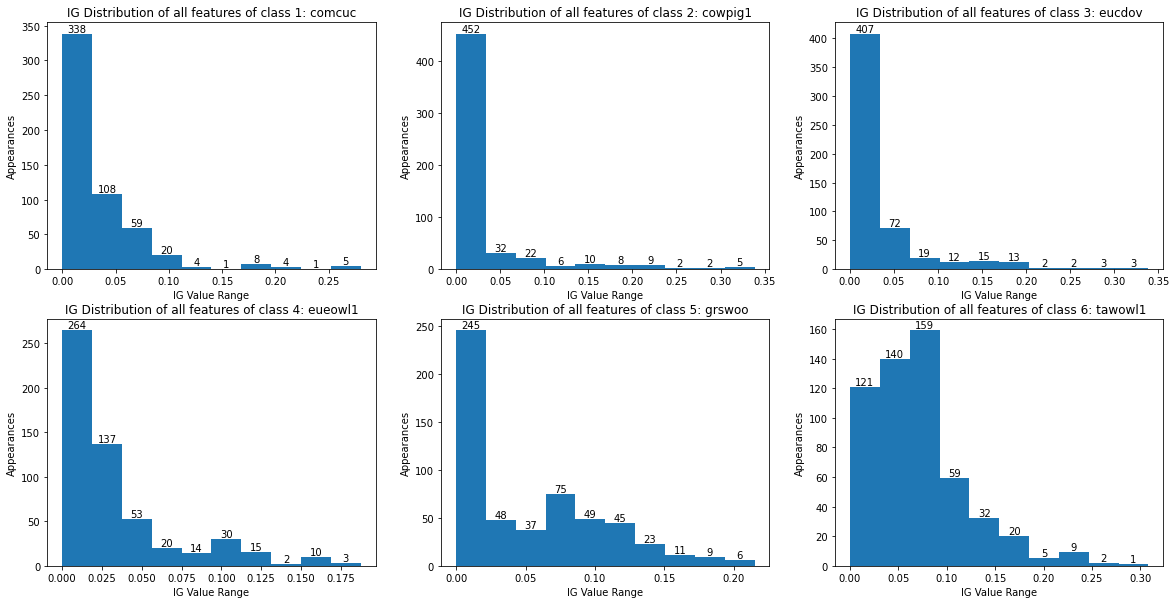

In [99]:
def modify_histogram(axs, mutual_info, indices, _class):
    n, bins, patches = axs[indices[0], indices[1]].hist(mutual_info, bins=10)
    
    # display the count on top of each rectangle
    for i, patch in enumerate(patches):
        x, y = patch.get_x() + patch.get_width() / 2, patch.get_height()
        axs[indices[0], indices[1]].text(x, y, int(n[i]), ha='center', va='bottom')
    axs[indices[0], indices[1]].set_xlabel('IG Value Range')
    axs[indices[0], indices[1]].set_ylabel('Appearances')
    axs[indices[0], indices[1]].set_title(f'IG Distribution of all features of class {_class}')


    
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, (indices, _class) in enumerate(zip([(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)], classes[1:])):
    modify_histogram(axs, mutual_infos[i], indices, _class)

plt.show()

C:\Users\Sandro\anaconda3\envs\ho2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sandro\anaconda3\envs\ho2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sandro\anaconda3\envs\ho2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

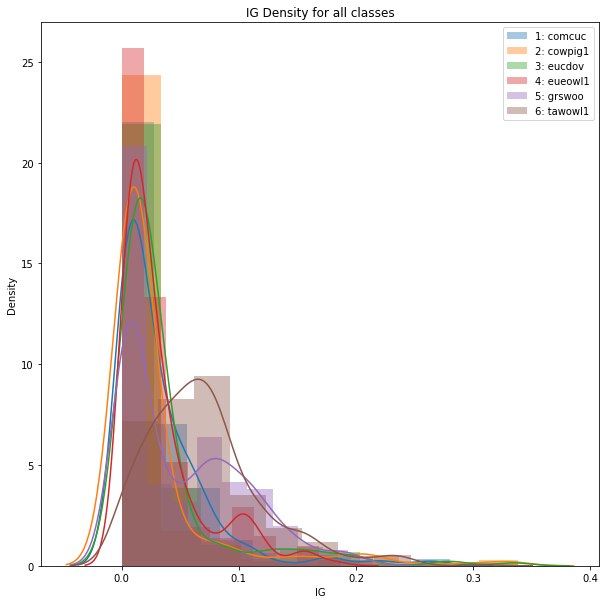

In [102]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

for mutual_info, _class in zip(mutual_infos, classes[1:]):
    #plt.hist(mutual_info, label=_class, alpha=0.5)
    sns.distplot(mutual_info, label=_class, hist=True, kde=True, bins=10, norm_hist=True)



plt.legend()
plt.title('IG Density for all classes')
plt.xlabel('IG')
plt.ylabel('Density')
plt.show()